# 10 min Project - Peng Yuan

## 0. Prepare for the Project

### 0.1 Import Package

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr,zscore
import seaborn as sns
import folium
from scipy.stats import zscore
import numpy as np
from sklearn.model_selection import train_test_split
from dmba import regressionSummary, exhaustive_search
import sklearn.linear_model as sklm
from dmba import adjusted_r2_score, AIC_score, BIC_score
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import accuracy_score
%matplotlib inline
from pyecharts.charts import Bar
from pyecharts import options as opts
from sklearn.inspection import permutation_importance

### 0.2 Read Data

In [2]:
Data_Scourse = pd.read_csv('./Large Data Sets/worlddata.csv')
Data_Scourse.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


### 0.3 Select variation

Screening variables based on the most relevant variables to CO2 damage selected by the 5 min project

In [28]:
variation = ['Agriculture, value added (% of GDP)',
 'Combustible renewables and waste (% of total energy)',
#   'Arable land (hectares)',
  'Armed forces personnel (% of total labor force)',
  'Average interest on new external debt commitments (%)',
  'Agricultural raw materials imports (% of merchandise imports)',
  'Adjusted savings: carbon dioxide damage (current US$)'
]

country_list = ['China','United States','Russian Federation']

df = Data_Scourse[(Data_Scourse['IndicatorName'].isin(variation)) &
                 (Data_Scourse['CountryName'] == 'China')]

In [29]:
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
7148,China,CHN,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,1960,23.383665
31436,China,CHN,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,1961,36.155738
58635,China,CHN,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,1962,39.423997
87021,China,CHN,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,1963,40.338928
115747,China,CHN,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,1964,38.445667


In [66]:
pivoted_df = df.pivot(index='Year', columns='IndicatorName', values='Value')
pivoted_df.rename(columns={'Adjusted savings: carbon dioxide damage (current US$)': 'CO2 Damage'}, inplace=True)
pivoted_df.dropna(inplace=True)
pivoted_df.tail()

IndicatorName,CO2 Damage,Agricultural raw materials imports (% of merchandise imports),"Agriculture, value added (% of GDP)",Armed forces personnel (% of total labor force),Average interest on new external debt commitments (%),Combustible renewables and waste (% of total energy)
Year,,,,,,
2008,6.348669e+10,3.558284,10.338382,0.371718,3.8224,9.749241
2009,7.067574e+10,3.365280,9.881688,0.377628,2.8851,9.181966
2010,7.759852e+10,3.718186,9.624434,0.377054,3.7789,8.455380
2011,8.742479e+10,4.194170,9.533373,0.372698,3.1462,7.878265
2012,9.690029e+10,3.861183,9.528271,0.376070,1.3397,7.459915


## 1. Preprocessed data

### 1.1 Check Nan Data

In [33]:
nan_count = pivoted_df.isna().sum()
nan_count

IndicatorName
CO2 Damage                                                       0
Agricultural raw materials imports (% of merchandise imports)    0
Agriculture, value added (% of GDP)                              0
Armed forces personnel (% of total labor force)                  0
Average interest on new external debt commitments (%)            0
Combustible renewables and waste (% of total energy)             0
dtype: int64

### 1.2 standardized(z-score)

In [34]:
columns_to_standardize = [col for col in pivoted_df.columns if col != 'CO2 Damage']

pivoted_df[columns_to_standardize] = pivoted_df[columns_to_standardize].apply(zscore)

In [35]:
pivoted_df.head()

IndicatorName,CO2 Damage,Agricultural raw materials imports (% of merchandise imports),"Agriculture, value added (% of GDP)",Armed forces personnel (% of total labor force),Average interest on new external debt commitments (%),Combustible renewables and waste (% of total energy)
Year,,,,,,
1990,1.215946e+10,2.199222,2.327047,1.017269,1.694858,1.373553
1991,1.335136e+10,2.319100,1.805641,0.269890,0.779082,1.531918
1992,1.441190e+10,0.649691,1.252232,0.078668,0.839878,1.409366
1993,1.593988e+10,-1.639889,0.838232,-0.304320,0.305635,1.187443
1994,1.749766e+10,0.037011,0.870173,-0.603204,0.337230,1.009931


Since the CO2 Damage data was too large, logarithmic conversion was also used to reduce the value.

In [36]:
pivoted_df['CO2 Damage'] = np.log(pivoted_df['CO2 Damage'])

In [37]:
pivoted_df.head()

IndicatorName,CO2 Damage,Agricultural raw materials imports (% of merchandise imports),"Agriculture, value added (% of GDP)",Armed forces personnel (% of total labor force),Average interest on new external debt commitments (%),Combustible renewables and waste (% of total energy)
Year,,,,,,
1990,23.221374,2.199222,2.327047,1.017269,1.694858,1.373553
1991,23.314884,2.319100,1.805641,0.269890,0.779082,1.531918
1992,23.391320,0.649691,1.252232,0.078668,0.839878,1.409366
1993,23.492090,-1.639889,0.838232,-0.304320,0.305635,1.187443
1994,23.585333,0.037011,0.870173,-0.603204,0.337230,1.009931


In [39]:
len(pivoted_df)

23

### 1.3 Exploratory data analysis

/Users/xintong/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


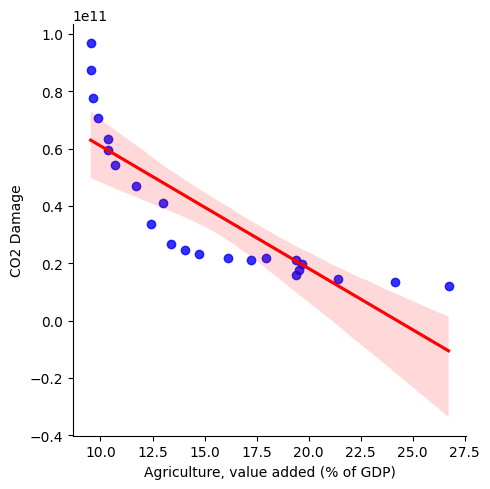

In [249]:
sns.lmplot(x="Agriculture, value added (% of GDP)", y="CO2 Damage" , data=pivoted_df, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})

/Users/xintong/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


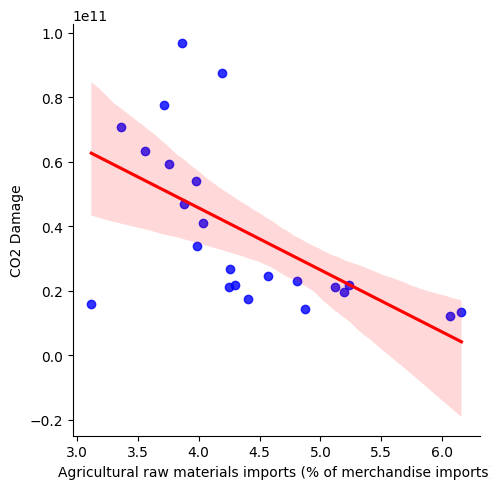

In [250]:
sns.lmplot(x="Agricultural raw materials imports (% of merchandise imports)", y="CO2 Damage" , data=pivoted_df, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})

/Users/xintong/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


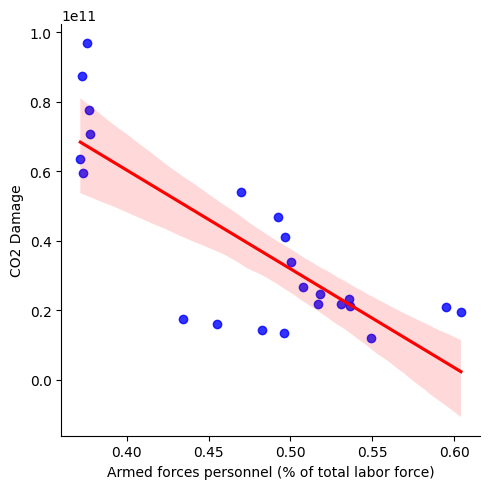

In [251]:
sns.lmplot(x="Armed forces personnel (% of total labor force)", y="CO2 Damage" , data=pivoted_df, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})

/Users/xintong/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


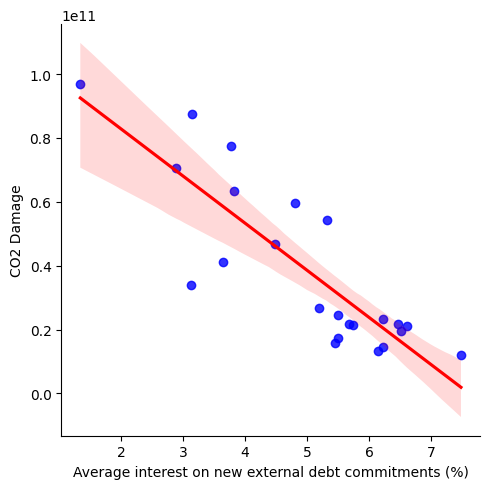

In [252]:
sns.lmplot(x="Average interest on new external debt commitments (%)", y="CO2 Damage" , data=pivoted_df, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})

/Users/xintong/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


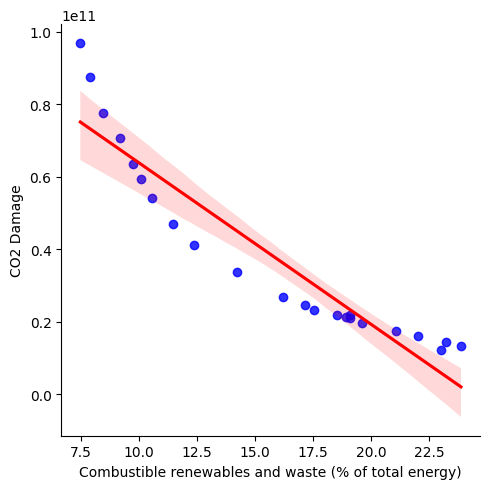

In [253]:
sns.lmplot(x="Combustible renewables and waste (% of total energy)", y="CO2 Damage" , data=pivoted_df, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})

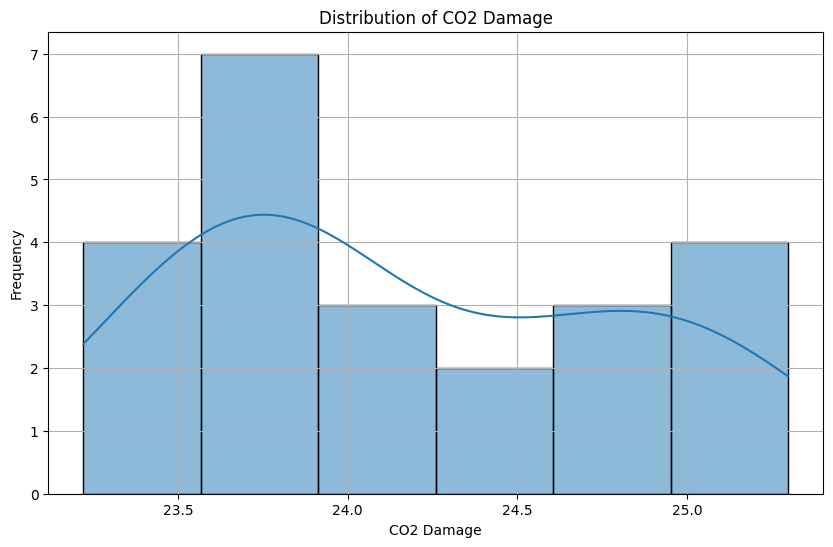

In [49]:
# Univariate analysis - "CO2 Damage"
plt.figure(figsize=(10, 6))
sns.histplot(pivoted_df['CO2 Damage'], kde=True)
plt.title('Distribution of CO2 Damage')
plt.xlabel('CO2 Damage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The "CO2 Damage" column has a mean of 24.17, a standard deviation of 0.65, a minimum value of 23.22 and a maximum value of 25.30.

The distribution of "CO2 Damage" is characterized by a certain degree of normal distribution.

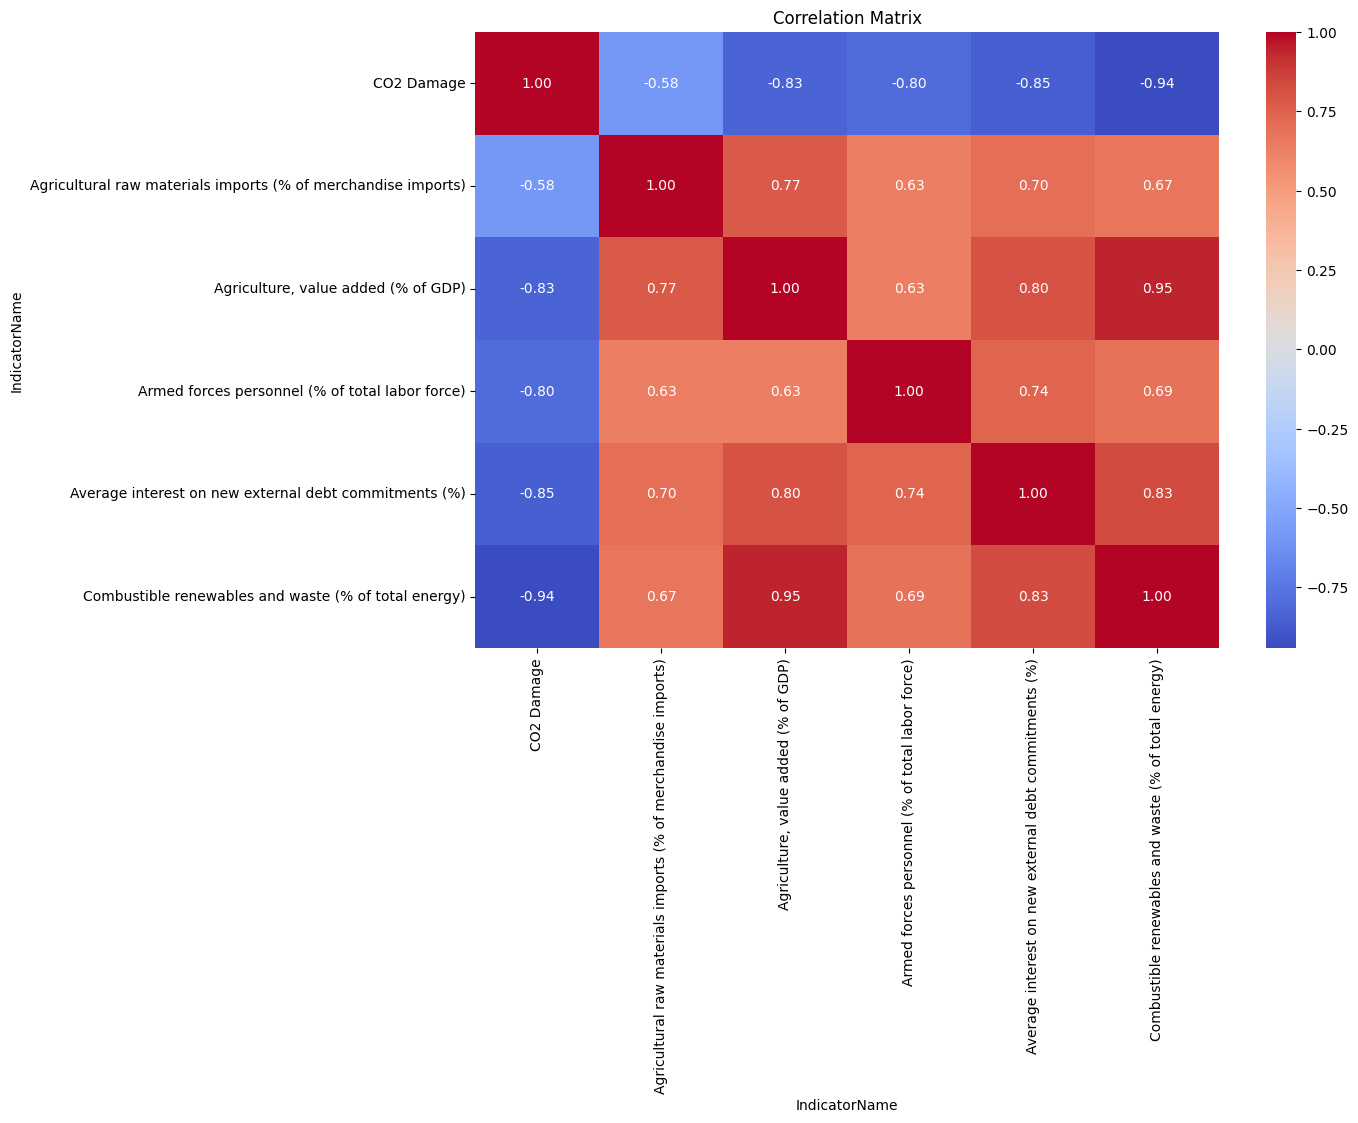

In [254]:
# Multivariate analysis - calculating correlation coefficients
correlation_matrix = pivoted_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('./coo_heatmap.png')
plt.show()

## 2. Linear model

In [53]:
predictors = ['Agriculture, value added (% of GDP)',
 'Combustible renewables and waste (% of total energy)',
  'Armed forces personnel (% of total labor force)',
  'Average interest on new external debt commitments (%)',
  'Agricultural raw materials imports (% of merchandise imports)'
]


outcome = 'CO2 Damage'

In [88]:
X = pd.get_dummies(pivoted_df[predictors], drop_first=True) # Converting object type variables (Fuel_Type in this case) into dummy
y = pivoted_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

In [89]:
def train_model(variables):
    model = sklm.LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

In [90]:
allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)
results

[{'n': 1,
  'variables': ['Combustible renewables and waste (% of total energy)'],
  'score': -0.856459019580424,
  'model': LinearRegression()},
 {'n': 2,
  'variables': ['Combustible renewables and waste (% of total energy)',
   'Armed forces personnel (% of total labor force)'],
  'score': -0.906757018925296,
  'model': LinearRegression()},
 {'n': 3,
  'variables': ['Combustible renewables and waste (% of total energy)',
   'Armed forces personnel (% of total labor force)',
   'Agricultural raw materials imports (% of merchandise imports)'],
  'score': -0.9371340740111146,
  'model': LinearRegression()},
 {'n': 4,
  'variables': ['Combustible renewables and waste (% of total energy)',
   'Armed forces personnel (% of total labor force)',
   'Average interest on new external debt commitments (%)',
   'Agricultural raw materials imports (% of merchandise imports)'],
  'score': -0.9495650924777925,
  'model': LinearRegression()},
 {'n': 5,
  'variables': ['Agriculture, value added (% o

In [91]:
data = []
for result in results[0:4]:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)

    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)

In [92]:
searchresults=pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables)))

/Users/xintong/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


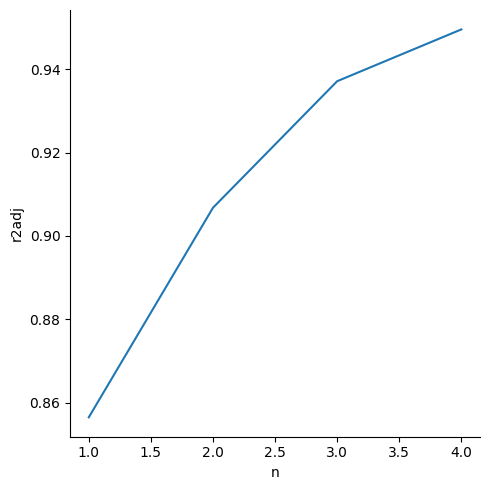

In [93]:
sns.relplot(x="n", y="r2adj", data=searchresults, kind="line")

Model 1: 'Combustible renewables and waste (% of total energy)' and 'Armed forces personnel (% of total labor force)' as the dependent variable.

Model 2:'Combustible renewables and waste (% of total energy)', 'Average interest on new external debt commitments (%)', and 'Agricultural raw materials imports (% of merchandise imports)' as the dependent variable.

Model 3 Uses all of the above variables.

In [94]:
import statsmodels.api as sm

# Preparing data for each model
X1 = train_X[['Combustible renewables and waste (% of total energy)', 'Armed forces personnel (% of total labor force)']]
X2 = train_X[['Combustible renewables and waste (% of total energy)', 'Average interest on new external debt commitments (%)', 'Agricultural raw materials imports (% of merchandise imports)']]
X3 = train_X[['Agriculture, value added (% of GDP)', 'Combustible renewables and waste (% of total energy)', 'Armed forces personnel (% of total labor force)', 'Average interest on new external debt commitments (%)', 'Agricultural raw materials imports (% of merchandise imports)']]

# The dependent variable (CO2 Damage)
Y = train_y

# Adding a constant to the independent variables
X1 = sm.add_constant(X1)
X2 = sm.add_constant(X2)
X3 = sm.add_constant(X3)

# Building the models
model1 = sm.OLS(Y, X1)
model2 = sm.OLS(Y, X2)
model3 = sm.OLS(Y, X3)

# Fitting the models
result1 = model1.fit()
result2 = model2.fit()
result3 = model3.fit()

# Summaries of the models
summary1 = result1.summary()
summary2 = result2.summary()
summary3 = result3.summary()

/Users/xintong/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/xintong/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/xintong/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [95]:
summary1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CO2 Damage   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     83.66
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           7.32e-09
Time:                        15:40:44   Log-Likelihood:                -433.77
No. Observations:                  18   AIC:                             873.5
Df Residuals:                      15   BIC:                             876.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 1.482e+11   1.42e+10     10.411      0.000    1.18e+11    1.79e+11
Combustible renewables and waste (% of total energy) -3.517e+09   4.67e+08     -7.536      0.000   -4.51e+09   -2.52e+09
Armed forces personnel (% of total labor force)      -1.122e+11   3.61e+10     -3.103      0.007   -1.89e+11   -3.51e+10
==============================================================================
Omnibus:                        2.085   Durbin-Watson:                   2.257
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                1.509
Skew:                           0.688   Prob(JB):                        0.470
Kurtosis:                       2.656   Cond. No.                         364.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
summary2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CO2 Damage   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     78.80
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           5.23e-09
Time:                        15:40:44   Log-Likelihood:                -430.29
No. Observations:                  18   AIC:                             868.6
Df Residuals:                      14   BIC:                             872.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                          8.852e+10   1.14e+10      7.764      0.000    6.41e+10    1.13e+11
Combustible renewables and waste (% of total energy)          -3.696e+09   6.76e+08     -5.470      0.000   -5.15e+09   -2.25e+09
Average interest on new external debt commitments (%)         -8.017e+09   2.13e+09     -3.769      0.002   -1.26e+10   -3.45e+09
Agricultural raw materials imports (% of merchandise imports)  1.079e+10   3.67e+09      2.939      0.011    2.92e+09    1.87e+10
==============================================================================
Omnibus:                        5.581   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                3.057
Skew:                          -0.894   Prob(JB):                        0.217
Kurtosis:                       3.939   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
summary3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CO2 Damage   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     64.81
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           2.90e-08
Time:                        15:40:44   Log-Likelihood:                -426.26
No. Observations:                  18   AIC:                             864.5
Df Residuals:                      12   BIC:                             869.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                          1.175e+11   1.49e+10      7.903      0.000    8.51e+10     1.5e+11
Agriculture, value added (% of GDP)                            1.053e+09   1.07e+09      0.980      0.347   -1.29e+09    3.39e+09
Combustible renewables and waste (% of total energy)          -4.525e+09   9.26e+08     -4.886      0.000   -6.54e+09   -2.51e+09
Armed forces personnel (% of total labor force)               -7.509e+10   3.35e+10     -2.242      0.045   -1.48e+11   -2.12e+09
Average interest on new external debt commitments (%)          -4.61e+09   2.28e+09     -2.022      0.066   -9.58e+09    3.57e+08
Agricultural raw materials imports (% of merchandise imports)  7.935e+09   4.37e+09      1.818      0.094   -1.58e+09    1.74e+10
==============================================================================
Omnibus:                        2.487   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.288   Jarque-Bera (JB):                1.222
Skew:                          -0.630   Prob(JB):                        0.543
Kurtosis:                       3.208   Cond. No.                         651.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

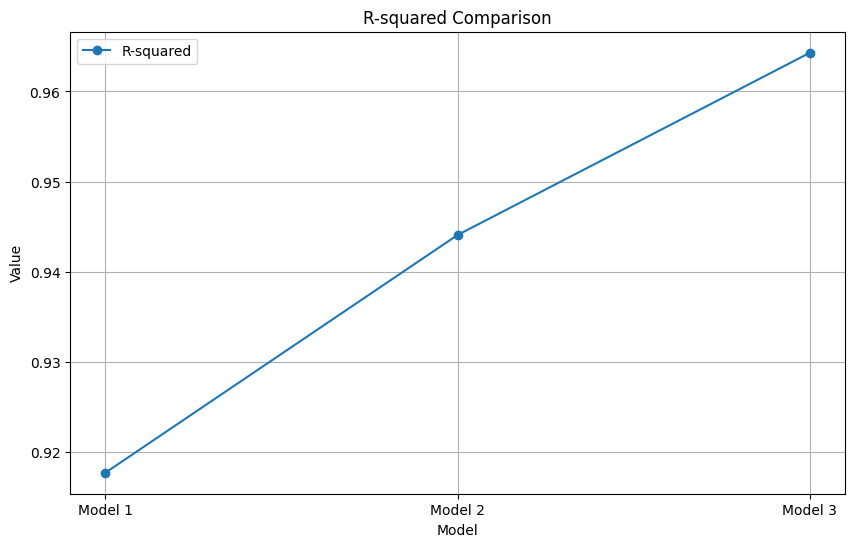

In [98]:
models = ['Model 1', 'Model 2', 'Model 3']
r_squared = [result1.rsquared, result2.rsquared, result3.rsquared]
adjusted_r_squared = [result1.rsquared_adj, result2.rsquared_adj, result3.rsquared_adj]
aic = [result1.aic, result2.aic, result3.aic]
bic = [result1.bic, result2.bic, result3.bic]

# Creating a DataFrame for comparison
model_comparison = pd.DataFrame({
    'Model': models,
    'R-squared': r_squared,
    'Adjusted R-squared': adjusted_r_squared,
    'AIC': aic,
    'BIC': bic
})

# Melting the DataFrame for easy plotting
model_comparison_melted = model_comparison.melt(id_vars='Model', var_name='Metric', value_name='Value')

plt.figure(figsize=(10, 6))
plt.plot(model_comparison['Model'], model_comparison['R-squared'], label='R-squared', marker='o')
plt.title('R-squared Comparison')
plt.ylabel('Value')
plt.xlabel('Model')
plt.legend()
plt.grid(True)
plt.show()

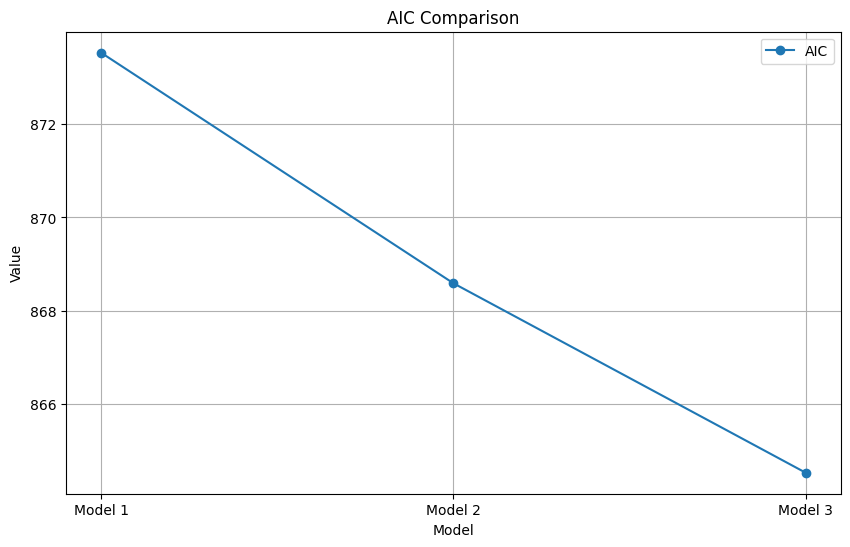

In [99]:
plt.figure(figsize=(10, 6))
plt.plot(model_comparison['Model'], model_comparison['AIC'], label='AIC', marker='o')
plt.title('AIC Comparison')
plt.ylabel('Value')
plt.xlabel('Model')
plt.legend()
plt.grid(True)
plt.show()

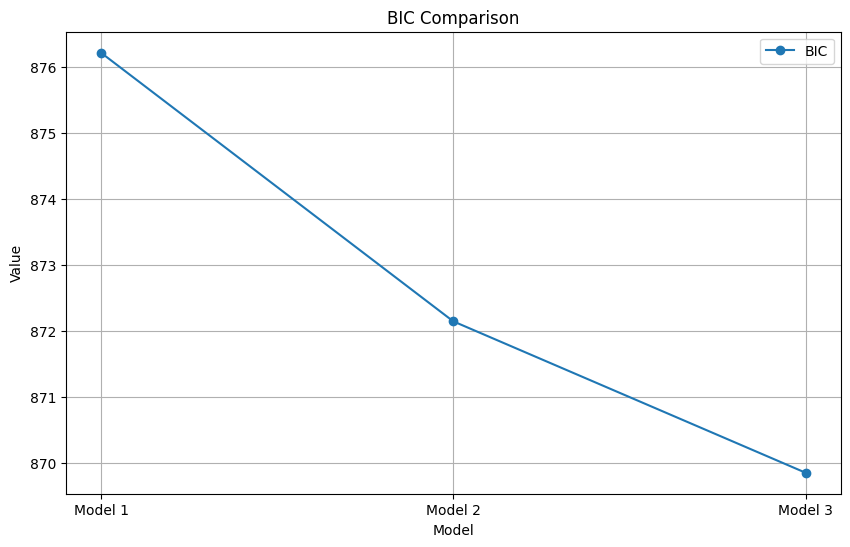

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(model_comparison['Model'], model_comparison['BIC'], label='BIC', marker='o')
plt.title('BIC Comparison')
plt.ylabel('Value')
plt.xlabel('Model')
plt.legend()
plt.grid(True)
plt.show()

/Users/xintong/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


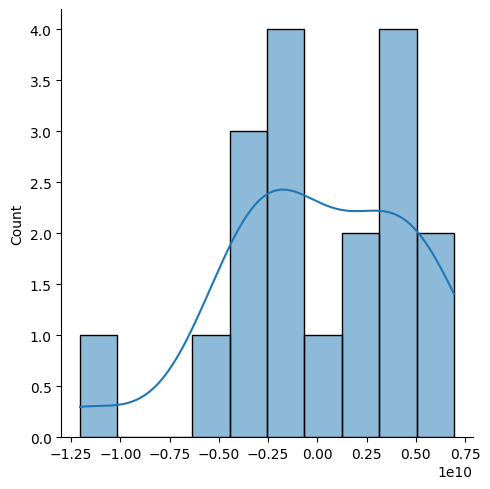

In [144]:
residuals=result3.resid
sns.displot(residuals, bins=10, kde=True, kind="hist")

In [114]:
from statsmodels.stats.diagnostic import het_breuschpagan
_, pval, __, f_pval = het_breuschpagan(residuals, X1)
bp_test = pd.DataFrame({'Value': [pval, f_pval], 'Test': ['Lagrange Multiplier p-value', 'F-statistic p-value']})
bp_test

,Value,Test
0,0.588504,Lagrange Multiplier p-value
1,0.634221,F-statistic p-value


The p-values of 0.58 and 0.63 indicate that there is no significant heteroscedasticity in the data

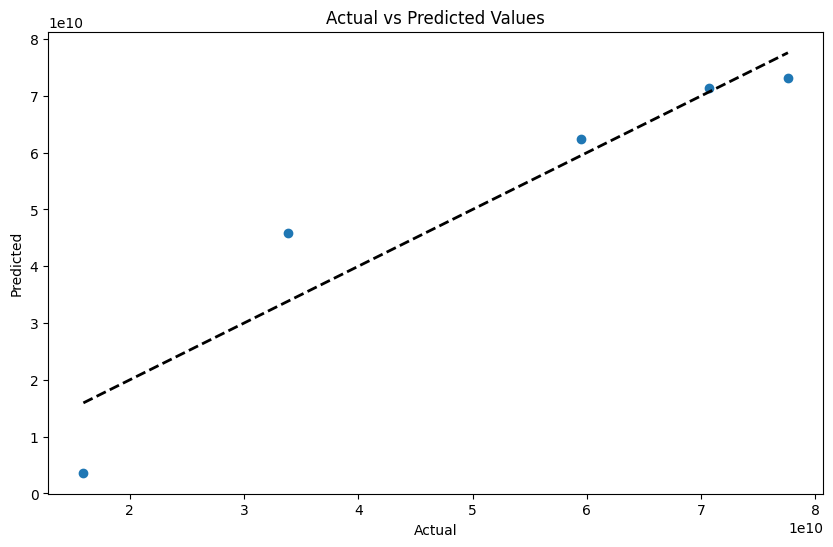

In [205]:
model = LinearRegression()
model.fit(train_X, train_y)

# Making predictions on the test set
Y_pred = model.predict(valid_X)

# Calculating performance metrics
mse_line = mean_squared_error(valid_y, Y_pred)
r2_line = r2_score(valid_y, Y_pred)
rmse_line = np.sqrt(mse_line)

# Visualizing the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(valid_y, Y_pred)
plt.plot([valid_y.min(), valid_y.max()], [valid_y.min(), valid_y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

In [206]:
print('mse:',mse_line)
print('rmse:',rmse_line)
print('r2:',r2_line)

mse: 6.496866690625516e+19
rmse: 8060314318.080603
r2: 0.8792436327603178


## 3. Random forest model

In [124]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [125]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(train_X, train_y)

RandomForestRegressor(random_state=42)

In [126]:
Y_pred_rf = rf_model.predict(valid_X)

mse_rf = mean_squared_error(valid_y, Y_pred_rf)
r2_rf = r2_score(valid_y, Y_pred_rf)

In [129]:
# Cross-validation
cv_scores = cross_val_score(rf_model, X3, Y, cv=5)

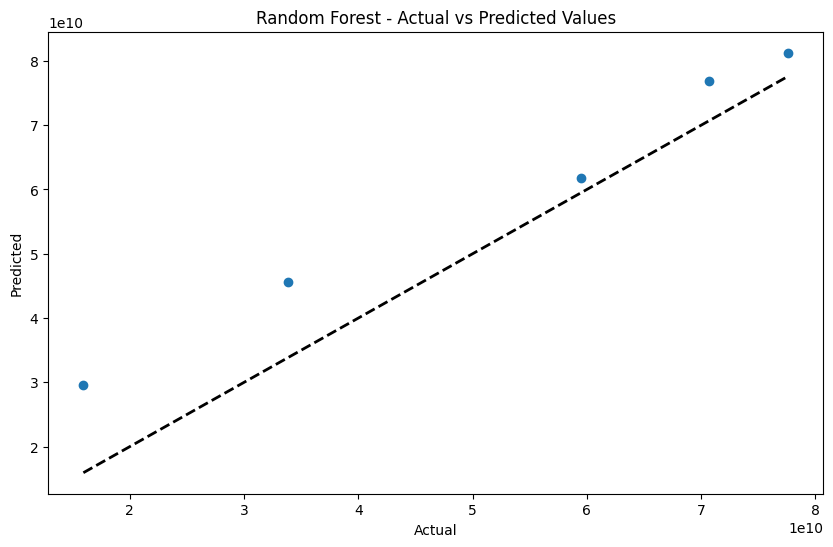

In [131]:
plt.figure(figsize=(10, 6))
plt.scatter(valid_y, Y_pred_rf)
plt.plot([valid_y.min(), valid_y.max()], [valid_y.min(), valid_y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest - Actual vs Predicted Values')
plt.show()

In [152]:
print("MSE:", round(mse_rf,2))
print("R-squared:", r2_rf)
print("Cross-validation Mean Score:", np.mean(cv_scores))
print("Cross-validation Standard Deviation:", np.std(cv_scores))

MSE: 7.702245890349947e+19
R-squared: 0.8568394154296736
Cross-validation Mean Score: 0.7888682674889788
Cross-validation Standard Deviation: 0.182295423308701


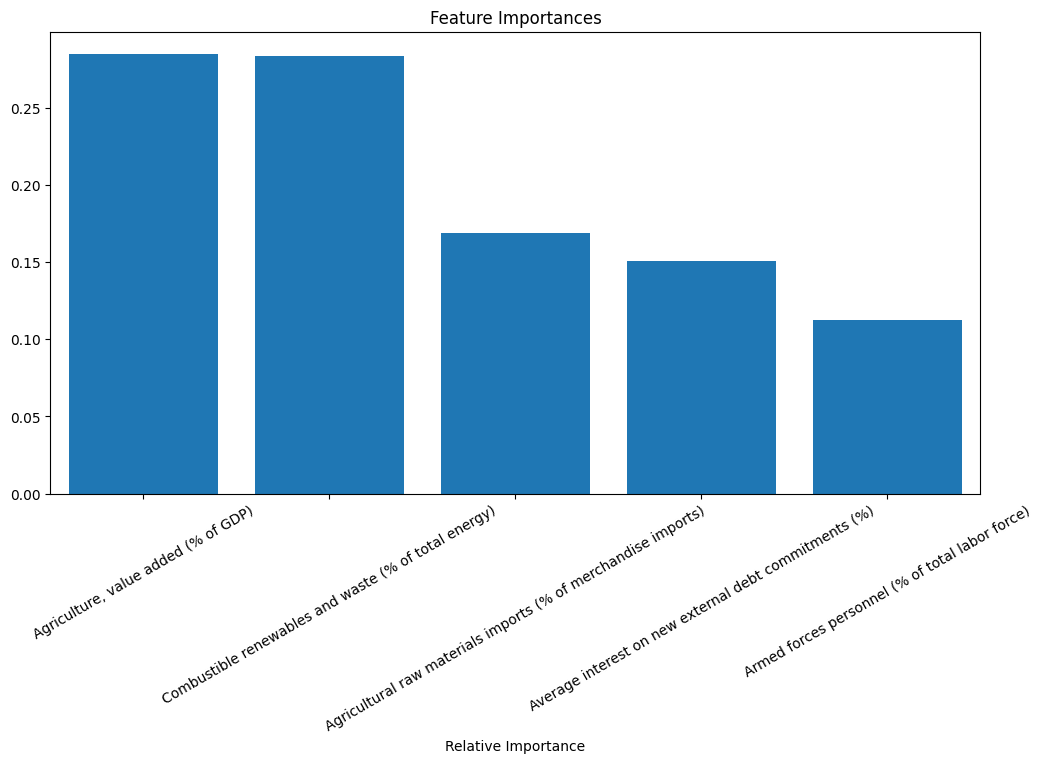

In [261]:
# Feature Importance Visualization
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(train_X.shape[1]), importances[indices], align='center')
plt.xticks(range(train_X.shape[1]), train_X.columns[indices], rotation=30)
plt.xlim([-0.5, train_X.shape[1]-0.5])
plt.xlabel('Relative Importance')
plt.show()

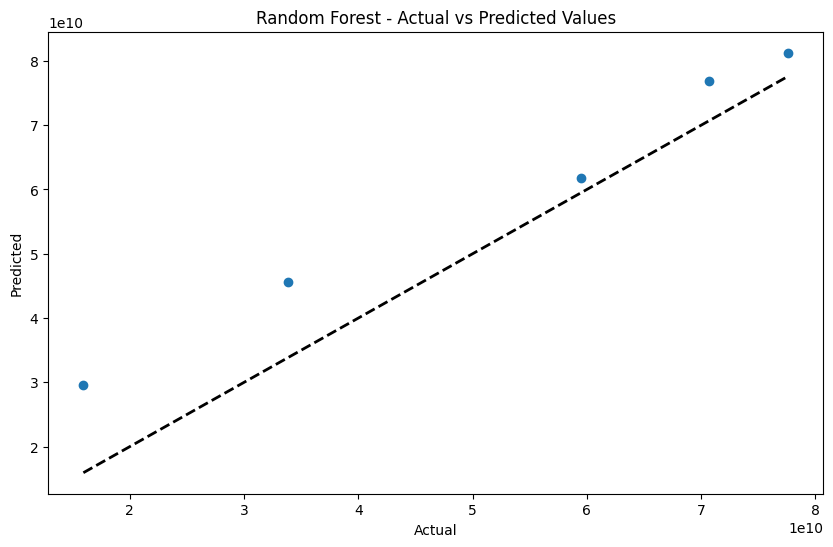

In [136]:
# Comparison of actual and projected values
plt.figure(figsize=(10, 6))
plt.scatter(valid_y, Y_pred_rf)
plt.plot([valid_y.min(), valid_y.max()], [valid_y.min(), valid_y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest - Actual vs Predicted Values')
plt.show()

## 4. KNN model

In [146]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [149]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(valid_X)

In [150]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, train_y)

KNeighborsRegressor()

In [151]:
Y_pred_knn = knn_model.predict(X_test_scaled)
mse_knn = mean_squared_error(valid_y, Y_pred_knn)
r2_knn = r2_score(valid_y, Y_pred_knn)
print("MSE:", mse_knn)
print("R-squared:", r2_knn)

MSE: 2.3531437307222053e+19
R-squared: 0.9562624412588204


### model optimization

In [153]:
from sklearn.model_selection import GridSearchCV

In [165]:
param_grid = {'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train_scaled, train_y)

best_knn_model = grid_search.best_estimator_

/Users/xintong/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/xintong/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/xintong/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "/Users/xintong/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 759, in score
    y_pred = self.predict(X)
  File "/Users/xintong/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_regression.py", line 237, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/Users/xintong/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_base.py", line 808, in kneighbors
  

In [166]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [167]:
Y_pred_best_knn = best_knn_model.predict(X_test_scaled)

In [170]:
mse_best_knn = mean_squared_error(valid_y, Y_pred_best_knn)
r2_best_knn = r2_score(valid_y, Y_pred_best_knn)

In [171]:
print("MSE of Best KNN Model:", mse_best_knn)
print("R-squared of Best KNN Model:", r2_best_knn)

MSE of Best KNN Model: 3.248459497423692e+19
R-squared of Best KNN Model: 0.9396213302944714


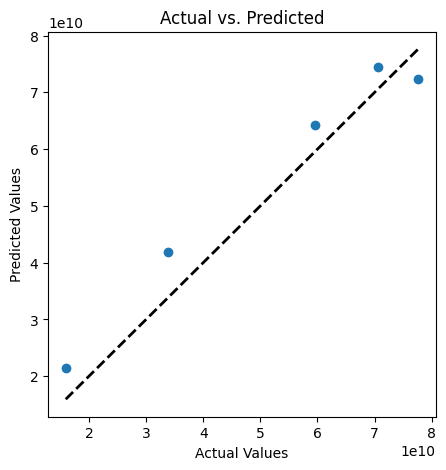

In [242]:
plt.scatter(valid_y, Y_pred_best_knn)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.plot([valid_y.min(), valid_y.max()], [valid_y.min(), valid_y.max()], 'k--', lw=2)
plt.show()


## 5. XGBOOST Model

In [184]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)

xg_reg.fit(train_X, train_y)

Y_pred_xgboots = xg_reg.predict(valid_X)


In [186]:
mse_xgboost = mean_squared_error(valid_y, Y_pred_xgboots)
r2_xgboost = r2_score(valid_y, Y_pred_xgboots)

In [187]:
print("MSE:", mse_xgboost)
print("R-squared:", r2_xgboost)

MSE: 1.1524751853118523e+20
R-squared: 0.7857910230589329


### model optimization

In [188]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(train_X, train_y)
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [192]:
optimized_xg_reg = xgb.XGBRegressor(**best_params)
optimized_xg_reg.fit(train_X, train_y)

Y_pred_optimized = optimized_xg_reg.predict(valid_X)

In [194]:
mse_xgboost_optimized = mean_squared_error(valid_y, Y_pred_optimized)
r2_xgboost_optimized = r2_score(valid_y, Y_pred_optimized)
print("Optimized MSE:", mse_xgboost_optimized)
print("Optimized R-squared:", r2_xgboost_optimized)

Optimized MSE: 1.0190083275810033e+20
Optimized R-squared: 0.8105983242611083


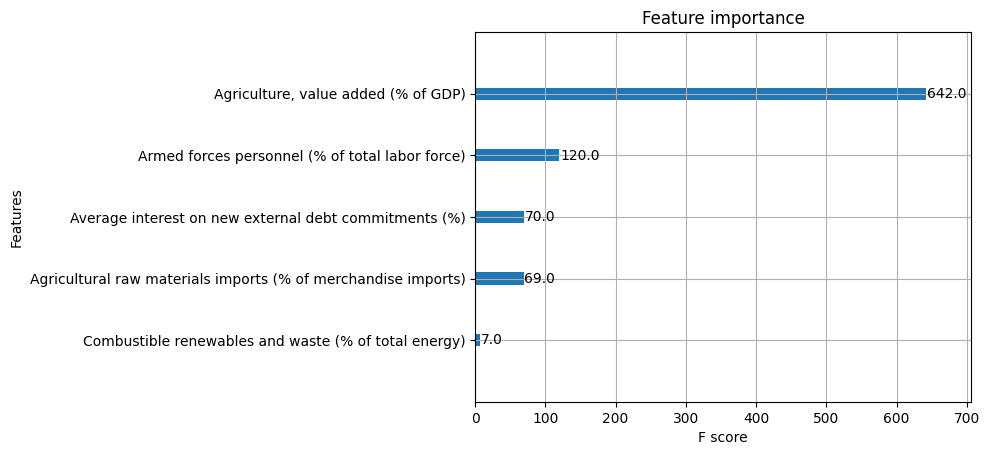

In [195]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

## 6. model comparison

### MSE

In [258]:
bar = Bar()
bar.add_xaxis(['XGBoost Optimized', 'Best KNN', 'Random Forest', 'Linear Regression'])

# 添加经过缩放的数据，这里我们使用亿为单位
bar.add_yaxis("MSE (in Billions)", 
              [mse_xgboost_optimized / 1e12, mse_best_knn / 1e12, mse_rf / 1e12, mse_line / 1e12],
              label_opts=opts.LabelOpts(is_show=False),
              itemstyle_opts=opts.ItemStyleOpts(color='red'))

# 设置全局配置
bar.set_global_opts(title_opts=opts.TitleOpts(title="MSE Comparison of Different Models"),
                    toolbox_opts=opts.ToolboxOpts(),
                    legend_opts=opts.LegendOpts(is_show=False))

# 渲染图表
bar.render_notebook()

### R2

In [259]:
bar = Bar()
bar.add_xaxis(['XGBoost Optimized', 'Best KNN', 'Random Forest', 'Linear Regression'])

# 添加经过缩放的数据，这里我们使用亿为单位
bar.add_yaxis("R2 (in Billions)", 
              [round(r2_xgboost_optimized,2), round(r2_best_knn,2), round(r2_rf,2), round(r2_line,2)],
              label_opts=opts.LabelOpts(is_show=True))

# 设置全局配置
bar.set_global_opts(title_opts=opts.TitleOpts(title="R2 Comparison of Different Models"),
                    toolbox_opts=opts.ToolboxOpts(),
                    legend_opts=opts.LegendOpts(is_show=False))

# 渲染图表
bar.render_notebook()